In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import lux

In [2]:
def basic_visualization(dataset):
    pass

In [3]:
def BloodGroupTypes(data):
    data.loc[(data['Blood Group'] == 'A+')|(data['Blood Group'] == 'A'),'Blood Group']='A+ve'
    data.loc[(data['Blood Group'] == 'B+')|(data['Blood Group'] == 'B'),'Blood Group']='B+ve'
    data.loc[(data['Blood Group'] == 'O+')|(data['Blood Group'] == 'O'),'Blood Group']='O+ve'
    data.loc[(data['Blood Group'] == 'AB+')|(data['Blood Group'] == 'AB'),'Blood Group']='AB+ve'
    data.loc[(data['Blood Group'] == 'A-'),'Blood Group']='A-ve'
    data.loc[(data['Blood Group'] == 'B-'),'Blood Group']='B-ve'
    data.loc[(data['Blood Group'] == 'O-'),'Blood Group']='O-ve'
    data.loc[(data['Blood Group'] == 'AB-'),'Blood Group']='AB-ve'
    return data

In [4]:
def data_cleaning(dataset):
    print("Initial size of dataset {}".format(dataset.shape))
    err= dataset[ data['Blood Group'] == '#REF!' ].index
    dataset.drop(err, inplace=True)
    print("Dataset Size after removing err records {}".format(dataset.shape))
    errVAl= data[ data['Age in yrs'] == '#VALUE!' ].index
    dataset.drop(errVAl, inplace=True)
    errVAl= data[ data['BMI']== '#VALUE!' ].index
    dataset.drop(errVAl, inplace=True)
    print("Dataset Size after removing err value records {}".format(dataset.shape))    
    invalid_r= dataset[(dataset['Blood Group'].isnull()) & (dataset['Sex'].isnull())& (dataset['Height'].isnull())&(dataset['Weight'].isnull())& (dataset['BMI'].isnull())].index
    dataset.drop(invalid_r, inplace=True)
    print("Dataset Size after removing invalid records {}".format(dataset.shape))
    




    

In [5]:
def data_conversion(dataset):
    dataset=BloodGroupTypes(dataset)
    print("Blood Group Types available {}".format(data['Blood Group'].unique()))
    data['Age in yrs'] = data['Age in yrs'].apply(pd.to_numeric)
    data['Weight'] = data['Weight'].str.rstrip('kg').apply(pd.to_numeric)
    data['Height'] = data['Height'].str.rstrip('cm').apply(pd.to_numeric)
    data['Temperature'] = data['Temperature'].str.rstrip('F').apply(pd.to_numeric)
    data['Pulse'] = data['Pulse'].str.rstrip('per Min').apply(pd.to_numeric)
    data['BP'] = data['BP'].str.rstrip('mmHg')
    data['BMI'] = data['BMI'].apply(pd.to_numeric)
    

In [6]:
def BP_manipulation(data):
    data.loc[(data['BP'].isnull()) & (data['Weight'].between(20,42,inclusive=True))& (data['Age in yrs'] == 10),'BP']='96/117'
    data.loc[(data['BP'].isnull()) & (data['Weight'].between(20,42,inclusive=True))& (data['Age in yrs'] == 11),'BP']='98/119'
    data.loc[(data['BP'].isnull()) & (data['Weight'].between(20,42,inclusive=True))& (data['Age in yrs'] == 12),'BP']='100/121'
    data.loc[(data['BP'].isnull()) & (data['Weight']>=50) & (data['Age in yrs'] >= 13),'BP']='102/124'
    

In [7]:
def column_gen(data):
    new=data['BP'].str.split('/',n=1,expand=True)
    data['systolic']=new[0]
    data['diastolic']=new[1]
    new=data['Left_Eye_Power'].str.split('/',n=1,expand=True)
    data['LEP0']=new[0]
    data['LEP1']=new[1]
    new=data['Right_Eye_Power'].str.split('/',n=1,expand=True)
    data['REP0']=new[0]
    data['REP1']=new[1]
    new=data['Left_Eye_Pwr_WthGlass'].str.split('/',n=1,expand=True)
    data['LEPG0']=new[0]
    data['LEPG1']=new[1]
    new=data['Right_Eye_Pwr_WthGlass'].str.split('/',n=1,expand=True)
    data['REPG0']=new[0]
    data['REPG1']=new[1]
    
    
    

In [8]:
data=pd.read_csv('data.csv')

In [9]:
data_cleaning(data)
data_conversion(data)

Initial size of dataset (2803, 34)
Dataset Size after removing err records (2801, 34)
Dataset Size after removing err value records (2704, 34)
Dataset Size after removing invalid records (1316, 34)
Blood Group Types available ['A+ve' 'O+ve' 'B+ve' 'AB+ve' 'O-ve' 'B-ve' nan 'A-ve' 'AB-ve']


In [10]:
column_gen(data)

In [11]:
errVAl= data[ data['BMI'] == '#VALUE!' ].index


In [12]:
data.head(400)

,UHID,Sex,Age in yrs,Blood Group,Class,School ID,Height,Weight,BMI,Temperature,...,systolic,diastolic,LEP0,LEP1,REP0,REP1,LEPG0,LEPG1,REPG0,REPG1
0,100-0000-0001,Male,13,A+ve,8,S0000001,152.2,57.2,24.7,96.4,...,104,75,6,6,6,36,6,6,6,12
1,100-0000-0002,Male,14,O+ve,8,S0000001,160.7,36.9,14.3,97.5,...,150,69,6,6,6,6,NaN,NaN,NaN,NaN
2,100-0000-0003,Female,13,O+ve,8,S0000001,143.7,37.2,18.0,97.7,...,113,67,6,6,6,6,NaN,NaN,NaN,NaN
3,100-0000-0004,Female,13,B+ve,8,S0000001,157.3,45.4,18.3,97.8,...,114,78,6,6,6,6,NaN,NaN,NaN,NaN
4,100-0000-0005,Male,14,B+ve,8,S0000001,154.2,40.1,16.9,9.3,...,95,56,6,6,6,6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,100-0000-0497,Female,13,O+ve,8,S0000003,152.7,35.5,15.2,98.5,...,111,85,6,12,6,12,6,6,6,6
422,100-0000-0498,Male,13,B+ve,8,S0000003,164.7,62.1,22.9,97.5,...,119,71,6,24,6,24,6,6,6,6
423,100-0000-0499,Female,13,O+ve,8,S0000003,154.5,39.0,16.3,99.3,...,113,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
424,100-0000-0500,Female,14,A+ve,8,S0000003,154.5,44.6,18.7,98.5,...,147,91,6,6,6,6,NaN,NaN,NaN,NaN


In [13]:
#data1 = pd.read_excel("HKinterns_shared_data.xlsx",engine='openpyxl',)

In [14]:
data.columns

Index(['UHID', 'Sex', 'Age in yrs', 'Blood Group', 'Class', ' School ID',
       'Height', 'Weight', 'BMI', 'Temperature', 'BP', 'Pulse', 'CBTestResult',
       'Caries', 'Discoloration', 'Healthy_Gums', 'Malocclusion',
       'Oral_Hygine', 'TeethWellFormed', 'Serious_Dental_Issue',
       'Dentist_Recommendation', 'LEFT_EAR', 'RIGHT_EAR', 'ENT_Issue',
       'Eye_Issue', 'ENT_Issue_Detail', 'Eye_Issue_Detail', 'Wears_Glass',
       'Left_Eye_Power', 'Right_Eye_Power', 'Left_Eye_Pwr_WthGlass',
       'Right_Eye_Pwr_WthGlass', 'Overall Summary', 'Recommendation',
       'systolic', 'diastolic', 'LEP0', 'LEP1', 'REP0', 'REP1', 'LEPG0',
       'LEPG1', 'REPG0', 'REPG1'],
      dtype='object')

In [15]:
data.head()

,UHID,Sex,Age in yrs,Blood Group,Class,School ID,Height,Weight,BMI,Temperature,...,systolic,diastolic,LEP0,LEP1,REP0,REP1,LEPG0,LEPG1,REPG0,REPG1
0,100-0000-0001,Male,13,A+ve,8,S0000001,152.2,57.2,24.7,96.4,...,104,75,6,6,6,36,6,6,6,12
1,100-0000-0002,Male,14,O+ve,8,S0000001,160.7,36.9,14.3,97.5,...,150,69,6,6,6,6,NaN,NaN,NaN,NaN
2,100-0000-0003,Female,13,O+ve,8,S0000001,143.7,37.2,18.0,97.7,...,113,67,6,6,6,6,NaN,NaN,NaN,NaN
3,100-0000-0004,Female,13,B+ve,8,S0000001,157.3,45.4,18.3,97.8,...,114,78,6,6,6,6,NaN,NaN,NaN,NaN
4,100-0000-0005,Male,14,B+ve,8,S0000001,154.2,40.1,16.9,9.3,...,95,56,6,6,6,6,NaN,NaN,NaN,NaN


In [16]:

#sns.pairplot(data,hue='Sex')


In [17]:
data.corr(method ='spearman')

,Age in yrs,Height,Weight,BMI,Temperature,Pulse
Age in yrs,1.000000,0.939495,0.880381,0.533468,-0.237794,-0.214955
Height,0.939495,1.000000,0.932793,0.583786,-0.251815,-0.176448
Weight,0.880381,0.932793,1.000000,0.813248,-0.306335,-0.048817
BMI,0.533468,0.583786,0.813248,1.000000,-0.360938,0.047238
Temperature,-0.237794,-0.251815,-0.306335,-0.360938,1.000000,0.125926
Pulse,-0.214955,-0.176448,-0.048817,0.047238,0.125926,1.000000


In [18]:
bmi_correl = data[['Height','Weight','BMI','Age in yrs']].corr(method='pearson')
bmi_correl

,Height,Weight,BMI,Age in yrs
Height,1.000000,0.632792,0.290891,0.656220
Weight,0.632792,1.000000,0.915726,0.550950
BMI,0.290891,0.915726,1.000000,0.330319
Age in yrs,0.656220,0.550950,0.330319,1.000000


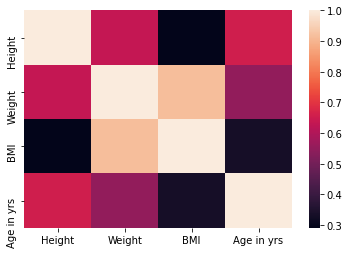

In [19]:
import seaborn as sns
import plotly.express as px
ax = sns.heatmap(bmi_correl)
fig = px.imshow(data)

In [20]:
#import plotly.graph_objects as go   
# from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
# xdf=['Height','Weight','BMI','Age in yrs']
# ydf=['Age in yrs','BMI','Weight','Height']
# zdf = np.array(bmi_correl)
# trace = go.Heatmap(x=xdf,y=ydf,z=zdf,type='heatmap',colorscale='GnBu')
# data = [trace]
# fig=go.Figure(data=data)
# iplot(fig)


*convert xlsx into csv
*remove rows with blood group '#REF!'
*adjusting blood group types
*remove rows with all nan values(except age column)



In [21]:
data.head()

,UHID,Sex,Age in yrs,Blood Group,Class,School ID,Height,Weight,BMI,Temperature,...,systolic,diastolic,LEP0,LEP1,REP0,REP1,LEPG0,LEPG1,REPG0,REPG1
0,100-0000-0001,Male,13,A+ve,8,S0000001,152.2,57.2,24.7,96.4,...,104,75,6,6,6,36,6,6,6,12
1,100-0000-0002,Male,14,O+ve,8,S0000001,160.7,36.9,14.3,97.5,...,150,69,6,6,6,6,NaN,NaN,NaN,NaN
2,100-0000-0003,Female,13,O+ve,8,S0000001,143.7,37.2,18.0,97.7,...,113,67,6,6,6,6,NaN,NaN,NaN,NaN
3,100-0000-0004,Female,13,B+ve,8,S0000001,157.3,45.4,18.3,97.8,...,114,78,6,6,6,6,NaN,NaN,NaN,NaN
4,100-0000-0005,Male,14,B+ve,8,S0000001,154.2,40.1,16.9,9.3,...,95,56,6,6,6,6,NaN,NaN,NaN,NaN


In [22]:
data1=pd.read_csv('bp values.csv')
data1

,Years,Systolic,Diastolic,Gender
0,3,100,59,Male
1,4,102,62,Male
2,5,104,65,Male
3,6,105,68,Male
4,7,106,70,Male
5,8,107,71,Male
6,9,109,72,Male
7,10,111,73,Male
8,11,113,74,Male
9,12,115,74,Male


In [23]:
#data[['systolic', 'diastolic']] = data[['systolic','diastolic']].fillna(value=0)



In [33]:
data['systolic'] = data['systolic'].replace('0', np.nan)
data['diastolic']=data['diastolic'].replace('0',np.nan)
data[['systolic', 'diastolic']] = data[['systolic','diastolic']].fillna(value=0)


In [34]:
def toint(data):
    return int(data[0])
data['systolic'] = pd.to_numeric(data['systolic'], errors='coerce')
data['diastolic'] = pd.to_numeric(data['diastolic'], errors='coerce')
data['systolic'] = data['systolic'].astype(int)
data['diastolic']=data['diastolic'].astype(int)

In [35]:
data['bp_condition']=data[['Age in yrs','Sex','systolic','diastolic']].apply(bp_con,axis=1)

NameError: name 'bp_con' is not defined

In [36]:
data.keys()

Index(['UHID', 'Sex', 'Age in yrs', 'Blood Group', 'Class', ' School ID',
       'Height', 'Weight', 'BMI', 'Temperature', 'BP', 'Pulse', 'CBTestResult',
       'Caries', 'Discoloration', 'Healthy_Gums', 'Malocclusion',
       'Oral_Hygine', 'TeethWellFormed', 'Serious_Dental_Issue',
       'Dentist_Recommendation', 'LEFT_EAR', 'RIGHT_EAR', 'ENT_Issue',
       'Eye_Issue', 'ENT_Issue_Detail', 'Eye_Issue_Detail', 'Wears_Glass',
       'Left_Eye_Power', 'Right_Eye_Power', 'Left_Eye_Pwr_WthGlass',
       'Right_Eye_Pwr_WthGlass', 'Overall Summary', 'Recommendation',
       'systolic', 'diastolic', 'LEP0', 'LEP1', 'REP0', 'REP1', 'LEPG0',
       'LEPG1', 'REPG0', 'REPG1'],
      dtype='object')

In [37]:
data.head()

,UHID,Sex,Age in yrs,Blood Group,Class,School ID,Height,Weight,BMI,Temperature,...,systolic,diastolic,LEP0,LEP1,REP0,REP1,LEPG0,LEPG1,REPG0,REPG1
0,100-0000-0001,Male,13,A+ve,8,S0000001,152.2,57.2,24.7,96.4,...,104,75,6,6,6,36,6,6,6,12
1,100-0000-0002,Male,14,O+ve,8,S0000001,160.7,36.9,14.3,97.5,...,150,69,6,6,6,6,NaN,NaN,NaN,NaN
2,100-0000-0003,Female,13,O+ve,8,S0000001,143.7,37.2,18.0,97.7,...,113,67,6,6,6,6,NaN,NaN,NaN,NaN
3,100-0000-0004,Female,13,B+ve,8,S0000001,157.3,45.4,18.3,97.8,...,114,78,6,6,6,6,NaN,NaN,NaN,NaN
4,100-0000-0005,Male,14,B+ve,8,S0000001,154.2,40.1,16.9,9.3,...,95,56,6,6,6,6,NaN,NaN,NaN,NaN


In [38]:
def bp_con(cols):
    age=cols[0]
    sex=cols[1]
    sys=cols[2]
    dia=cols[3] if cols[3]!='' else 0
    if sys==0 or dia==0:
        return "NA"
    sys=int(sys)
    dia=int(dia)
    x1=data1[(data1['Gender']==sex) & (data1['Years']==age)]['Systolic']
    x2=data1[(data1['Gender']==sex) & (data1['Years']==age)]['Diastolic']
    x1 = int(''.join(map(str, x1)) if ''.join(map(str, x1))!='' else 0 )
    x2 = int(''.join(map(str, x2)) if ''.join(map(str, x2))!='' else 0)

    if (sys<=x1 and sys>(x1-10)) and (dia<=x2 and dia>(x2-5)):
        return "Normal"
    elif(sys<(x1-10) or dia<(x2-5)):
        return "Subnormal"
    elif(sys>x1 or dia>x2):
        return "Abnormal"
    else:
        return "NA"



In [39]:

print(bp_con([13,'Male',110,'']))

NA


SyntaxError: invalid syntax (<ipython-input-42-2516ad1cd221>, line 30)

In [41]:
data

,UHID,Sex,Age in yrs,Blood Group,Class,School ID,Height,Weight,BMI,Temperature,...,systolic,diastolic,LEP0,LEP1,REP0,REP1,LEPG0,LEPG1,REPG0,REPG1
0,100-0000-0001,Male,13,A+ve,8,S0000001,152.2,57.2,24.7,96.4,...,104,75,6,6,6,36,6,6,6,12
1,100-0000-0002,Male,14,O+ve,8,S0000001,160.7,36.9,14.3,97.5,...,150,69,6,6,6,6,NaN,NaN,NaN,NaN
2,100-0000-0003,Female,13,O+ve,8,S0000001,143.7,37.2,18.0,97.7,...,113,67,6,6,6,6,NaN,NaN,NaN,NaN
3,100-0000-0004,Female,13,B+ve,8,S0000001,157.3,45.4,18.3,97.8,...,114,78,6,6,6,6,NaN,NaN,NaN,NaN
4,100-0000-0005,Male,14,B+ve,8,S0000001,154.2,40.1,16.9,9.3,...,95,56,6,6,6,6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,100-0000-1501,Male,28,NaN,Teacher,S0000001,170.5,82.3,28.3,96.6,...,120,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1406,100-0000-1502,Male,49,NaN,Teacher,S0000001,170.0,77.0,26.6,98.6,...,155,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1407,100-0000-1503,Male,26,B+ve,Teacher,S0000001,150.5,35.2,15.5,98.2,...,88,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1408,100-0000-1504,Female,39,NaN,Teacher,S0000001,153.5,98.5,41.8,98.1,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
data1[(data1['Gender']=="Male") & (data1['Years']==3)]['Systolic'][0].astype(int)


100

In [44]:
data2=pd.read_csv('heights.csv')
data2

,Age,H1,H2,H3,Gender
0,5,97.2,100.5,119.3,Female
1,6,102.3,106.0,125.6,Female
2,7,107.4,111.4,131.9,Female
3,8,112.6,116.8,138.1,Female
4,9,117.8,122.4,144.5,Female
5,10,123.3,128.1,150.8,Female
6,11,128.8,133.7,156.8,Female
7,12,134.0,138.9,162.0,Female
8,13,138.2,142.9,165.9,Female
9,14,141.3,145.8,168.2,Female


In [51]:
def height_con(cols):
    age=cols[0]
    sex=cols[1]
    height=cols[2]
   
    h1=data2[(data2['Gender']==sex) & (data2['Age']==age)]['H1']
    h2=data2[(data2['Gender']==sex) & (data2['Age']==age)]['H2']
    h3=data2[(data2['Gender']==sex) & (data2['Age']==age)]['H3']
    h1 = float(''.join(map(str, h1)) if ''.join(map(str, h1))!='' else 0 )
    h2 = float(''.join(map(str, h2)) if ''.join(map(str, h2))!='' else 0 )
    h3 = float(''.join(map(str, h3)) if ''.join(map(str, h3))!='' else 0 )
    
    if (height<=h1):
        return "Stunted"
    elif(height>h1 and height<h2):
        return "Borderline"
    elif(height>h2 and height<h3):
        return "Normal"
    elif(height>h3):
        return "Over-height"
    else:
        return "NA"


In [52]:
data['height_condition']=data[['Age in yrs','Sex','Height']].apply(height_con,axis=1)

In [65]:
len(data[data["height_condition"]=="Over-height"])

150

In [85]:
def weight_con(cols):
    age=cols[0]
    sex=cols[1]
    weight=cols[2]
   
    w1=data3[(data3['Gender']==sex) & (data3['Age']==age)]['W1']
    w2=data3[(data3['Gender']==sex) & (data3['Age']==age)]['W2']
    w3=data3[(data3['Gender']==sex) & (data3['Age']==age)]['W3']
    w1 = float(''.join(map(str, w1)) if ''.join(map(str, w1))!='' else 0 )
    w2 = float(''.join(map(str, w2)) if ''.join(map(str, w2))!='' else 0 )
    w3 = float(''.join(map(str, w3)) if ''.join(map(str, w3))!='' else 0 )
    
    if (weight<=w1):
        return "Under-weight"
    elif(weight>w1 and weight<w2):
        return "Borderline"
    elif(weight>w2 and weight<w3):
        return "Normal"
    elif(weight>w3):
        return "Over-weight"
    else:
        return "NA"


In [86]:
data3=pd.read_csv('weights.csv')
data3

,Age,W1,W2,W3,Gender
0,2,9.807,10.501,15.074,Male
1,3,11.441,12.291,18.048,Male
2,4,12.902,13.904,20.852,Male
3,5,14.287,15.453,23.761,Male
4,6,14.500,15.800,28.300,Male
5,7,16.000,17.600,33.400,Male
6,8,17.500,19.500,39.400,Male
7,9,19.100,21.500,45.500,Male
8,10,20.700,23.500,51.800,Male
9,11,22.600,25.900,58.700,Male


In [87]:
data['weight_condition']=data[['Age in yrs','Sex','Weight']].apply(weight_con,axis=1)

In [93]:
len(data[data["weight_condition"]=="NA"])

4

In [95]:
data4=pd.read_csv('BMI.csv')
data4

,Age,Bmi1,Bmi2,Bmi3,Bmi4,Gender
0,2,13.924,16.019,16.8970,18.676,Male
1,3,13.482,15.599,16.4630,18.172,Male
2,4,13.187,15.333,16.2180,17.983,Male
3,5,12.600,14.946,15.9145,17.786,Male
4,6,12.200,14.900,16.0000,17.800,Male
5,7,12.300,15.100,16.3000,18.200,Male
6,8,12.500,15.500,16.7000,18.800,Male
7,9,12.700,15.900,17.3000,19.600,Male
8,10,12.900,16.400,18.0000,20.500,Male
9,11,13.100,17.000,18.7000,21.500,Male


In [99]:
def bmi_con(cols):
    age=cols[0]
    sex=cols[1]
    BMI=cols[2]
   
    b1=data4[(data4['Gender']==sex) & (data4['Age']==age)]['Bmi1']
    b2=data4[(data4['Gender']==sex) & (data4['Age']==age)]['Bmi2']
    b3=data4[(data4['Gender']==sex) & (data4['Age']==age)]['Bmi3']
    b4=data4[(data4['Gender']==sex) & (data4['Age']==age)]['Bmi4']
    b1 = float(''.join(map(str, b1)) if ''.join(map(str, b1))!='' else 0 )
    b2 = float(''.join(map(str, b2)) if ''.join(map(str, b2))!='' else 0 )
    b3 = float(''.join(map(str, b3)) if ''.join(map(str, b3))!='' else 0 )
    b4 = float(''.join(map(str, b4)) if ''.join(map(str, b4))!='' else 0 ) 
    
    if (BMI<=b1):
        return "Under-weight"
    elif(BMI>b1 and BMI<b2):
        return "Borderline"
    elif(BMI>b2 and BMI<b3):
        return "Normal"
    elif(BMI>b3 and BMI<b4):
        return "Over-weight"
    elif(BMI>b4):
        return "Obese"
    else:
        return "NA"


In [100]:
data['bmi_condition']=data[['Age in yrs','Sex','BMI']].apply(bmi_con,axis=1)

In [106]:
len(data[data["bmi_condition"]=="Borderline"])

671